<h1><center>FINAL

__Final Project: Analysis, ML, Visualization, Explanation__

__Student: Sharimbaev Batir__

__Instructor: Nabigazinova Elnura__

<h1>Analysis

In [1]:
# Import pandas for dataframe
import pandas as pd

In [2]:
# Create dataframe with data from `phones.csv` file
df = pd.read_csv('phones.csv',encoding='cp1251', delimiter=';')

In [3]:
df.head(10)

,Name,Product code,Price(Тг),Brand
0,Смартфон ОРРО Reno5 Fantasy Silver,487644,213390.0,OPPO
1,Смартфон ОРРО Reno5 Starry Black,487643,213390.0,OPPO
2,Смартфон Samsung Galaxy Note 20 Gray,467447,399890.0,Samsung
3,Смартфон Huawei P40 Lite Midnight Black,459926,116690.0,Huawei
4,Смартфон ОРРО Reno5 Lite Fantastic Purple,487642,152990.0,OPPO
5,Смартфон ОРРО Reno5 Lite Fluid Black,487641,152990.0,OPPO
6,Смартфон Huawei P40 Lite E Midnight Black,459929,79890.0,Huawei
7,Смартфон Samsung Galaxy A51 128GB Black,433475,149890.0,Samsung
8,Смартфон Samsung Galaxy A10 32GB Black,301999,54890.0,Samsung
9,Смартфон Samsung Galaxy S20 Ultra Gray,440300,489890.0,Samsung


In [4]:
# Info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          527 non-null    object 
 1   Product code  527 non-null    int64  
 2   Price(Тг)     527 non-null    float64
 3   Brand         527 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 12.4+ KB


In [5]:
# Shape of dataframe
df.shape

(527, 4)

In [6]:
# Describe of dataframe
df.describe()

,Product code,Price(Тг)
count,527.000000,527.000000
mean,428689.681214,208556.603416
std,100866.795644,195106.099400
min,70318.000000,12990.000000
25%,436917.500000,69890.000000
50%,467449.000000,118090.000000
75%,484679.500000,339290.000000
max,488644.000000,859890.000000


In [7]:
# Delete the word "Смартфон" at the head of all the names
df['Name'] = [i[9:] for i in df['Name']]

In [8]:
# Converted all float numbers to integer numbers
df['Price(Тг)'] = [int(i) for i in df['Price(Тг)']]

In [47]:
# Drop the last 3 rows
df.head(10)

,Name,Product code,Price(Тг),Brand,Code_brand
236,Apple iPhone 12 Pro Max 512GB Gold,474957,859890,Apple,3
250,Apple iPhone 12 Pro Max 512GB Graphite,474955,859890,Apple,3
483,Apple iPhone 12 Pro Max 512GB Silver,474956,859890,Apple,3
211,Apple iPhone 12 Pro Max 512GB Pacific Blue,474958,854890,Apple,3
286,Apple iPhone 12 Pro 512GB Graphite,474943,794890,Apple,3
263,Apple iPhone 12 Pro 512GB Gold,474945,794890,Apple,3
264,Apple iPhone 12 Pro 512GB Silver,474944,794890,Apple,3
245,Apple iPhone 12 Pro 512GB Pacific Blue,474946,794890,Apple,3
48,Samsung Galaxy Z Fold 2 Black,470333,777790,Samsung,1
70,Samsung Galaxy Z Fold 2 Brown,475938,777790,Samsung,1


In [10]:
# Remove all NULL values
df.dropna(inplace=True)

In [11]:
# We have not null properties
df.isnull().sum()

Name            0
Product code    0
Price(Тг)       0
Brand           0
dtype: int64

In [12]:
# Find total of brands and its phones
brands = df['Brand'].value_counts().index.tolist()
phones_by_brands = df['Brand'].value_counts().tolist()

In [49]:
# Read in pandas and we have 20 brands
df_brand = pd.DataFrame({'Brand': brands, 'Total of phones': phones_by_brands})
# 5 brands with the most number of phones
df_brand

,Brand,Total of phones
0,Samsung,131
1,Apple,103
2,Xiaomi,75
3,Huawei,51
4,OPPO,47
5,Vivo,26
6,Nokia,17
7,Tecno,15
8,Poco,13
9,Realme,11


In [16]:
# 5 brands with the least number of phones
df_brand.tail()

,Brand,Total of phones
14,Haier,4
15,Sony,2
16,Fly,2
17,HTC,2
18,Meizu,1


In [17]:
# Convert categorical data to numerical data
df['Code_brand'] = pd.factorize(df.Brand)[0]

In [18]:
df.head(10)

,Name,Product code,Price(Тг),Brand,Code_brand
0,ОРРО Reno5 Fantasy Silver,487644,213390,OPPO,0
1,ОРРО Reno5 Starry Black,487643,213390,OPPO,0
2,Samsung Galaxy Note 20 Gray,467447,399890,Samsung,1
3,Huawei P40 Lite Midnight Black,459926,116690,Huawei,2
4,ОРРО Reno5 Lite Fantastic Purple,487642,152990,OPPO,0
5,ОРРО Reno5 Lite Fluid Black,487641,152990,OPPO,0
6,Huawei P40 Lite E Midnight Black,459929,79890,Huawei,2
7,Samsung Galaxy A51 128GB Black,433475,149890,Samsung,1
8,Samsung Galaxy A10 32GB Black,301999,54890,Samsung,1
9,Samsung Galaxy S20 Ultra Gray,440300,489890,Samsung,1


In [19]:
# Sort phones by price and we can see 5 most expensive and cheapest phones
df.sort_values('Price(Тг)', ascending=False, inplace=True)
df.head(10)

,Name,Product code,Price(Тг),Brand,Code_brand
236,Apple iPhone 12 Pro Max 512GB Gold,474957,859890,Apple,3
250,Apple iPhone 12 Pro Max 512GB Graphite,474955,859890,Apple,3
483,Apple iPhone 12 Pro Max 512GB Silver,474956,859890,Apple,3
211,Apple iPhone 12 Pro Max 512GB Pacific Blue,474958,854890,Apple,3
286,Apple iPhone 12 Pro 512GB Graphite,474943,794890,Apple,3
263,Apple iPhone 12 Pro 512GB Gold,474945,794890,Apple,3
264,Apple iPhone 12 Pro 512GB Silver,474944,794890,Apple,3
245,Apple iPhone 12 Pro 512GB Pacific Blue,474946,794890,Apple,3
48,Samsung Galaxy Z Fold 2 Black,470333,777790,Samsung,1
70,Samsung Galaxy Z Fold 2 Brown,475938,777790,Samsung,1


In [20]:
# Group the phones by brand
group_by_brand = df.groupby('Brand')
group_by_brand

In [21]:
# Print name of brand and its phones
for brand, brand_df in group_by_brand:
    print(brand)
    print(brand_df)
    print()

Apple
                                           Name  Product code  Price(Тг)  \
236          Apple iPhone 12 Pro Max 512GB Gold        474957     859890   
250      Apple iPhone 12 Pro Max 512GB Graphite        474955     859890   
483        Apple iPhone 12 Pro Max 512GB Silver        474956     859890   
211  Apple iPhone 12 Pro Max 512GB Pacific Blue        474958     854890   
286          Apple iPhone 12 Pro 512GB Graphite        474943     794890   
..                                          ...           ...        ...   
408                  Apple iPhone 7 32GB Silver         70319     149990   
404              Apple iPhone 7 Plus 32GB Black         70401     129990   
459             Apple iPhone 6s 64GB Silver CPO        396817     119890   
435          Apple iPhone 6s 64GB Rose Gold CPO        396818     119890   
415         Apple iPhone 6s 64GB Space Grey CPO        394453     119890   

     Brand  Code_brand  
236  Apple           3  
250  Apple           3  
483  A

In [22]:
df.groupby('Brand')["Price(Тг)"].sum().sort_values(ascending=False)

Brand
Apple        46711070
Samsung      32893990
Xiaomi        7530250
OPPO          6638630
Huawei        6355190
Vivo          3029740
Poco          2129870
Realme        1177790
Nokia         1116830
Tecno          751350
Honor          283740
INOI           260910
Sony           219980
Haier          149960
HTC            104980
ZTE             99960
Prestigio       92550
Meizu           29990
Fly             25980
Name: Price(Тг), dtype: int64

In [23]:
# This is the average price of phones of this brand
df.groupby('Brand')["Price(Тг)"].mean().sort_values(ascending=False)

Brand
Apple        453505.533981
Samsung      251099.160305
Poco         163836.153846
OPPO         141247.446809
Huawei       124611.568627
Vivo         116528.461538
Sony         109990.000000
Realme       107071.818182
Xiaomi       100403.333333
Nokia         65695.882353
HTC           52490.000000
Tecno         50090.000000
Honor         47290.000000
Haier         37490.000000
Meizu         29990.000000
INOI          28990.000000
ZTE           24990.000000
Prestigio     18510.000000
Fly           12990.000000
Name: Price(Тг), dtype: float64

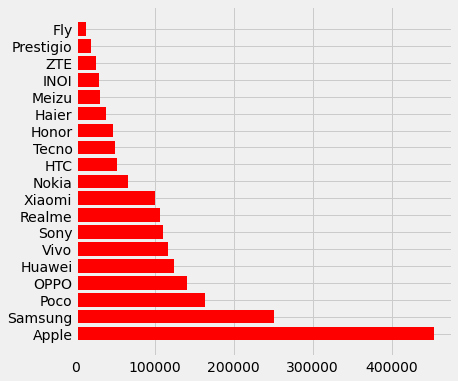

In [24]:
# Total price of phones of this brand
import matplotlib.pyplot as plt
prices_list = df.groupby('Brand')["Price(Тг)"].mean().sort_values(ascending=False).tolist()
brand_list = df.groupby('Brand')["Price(Тг)"].mean().sort_values(ascending=False).index.tolist()

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(111)
ax = plt.barh(brand_list, prices_list, color ='red')
plt.show()

In [25]:
df2 = df.copy()
df2

,Name,Product code,Price(Тг),Brand,Code_brand
236,Apple iPhone 12 Pro Max 512GB Gold,474957,859890,Apple,3
250,Apple iPhone 12 Pro Max 512GB Graphite,474955,859890,Apple,3
483,Apple iPhone 12 Pro Max 512GB Silver,474956,859890,Apple,3
211,Apple iPhone 12 Pro Max 512GB Pacific Blue,474958,854890,Apple,3
286,Apple iPhone 12 Pro 512GB Graphite,474943,794890,Apple,3
...,...,...,...,...,...
502,ZTE Blade L8 1/16GB Black,443024,14990,ZTE,17
441,Prestigio Wize YA3 Black,389863,13990,Prestigio,7
507,Fly Stratus 7 Black,87276,12990,Fly,18
521,Fly Life Compact Black,87277,12990,Fly,18


In [26]:
#By Apply, I write the word "Смартфон" again in head of the phone names
df2['Product code'] = df2['Product code'].apply(lambda x: "№ " + str(x))
df2

,Name,Product code,Price(Тг),Brand,Code_brand
236,Apple iPhone 12 Pro Max 512GB Gold,№ 474957,859890,Apple,3
250,Apple iPhone 12 Pro Max 512GB Graphite,№ 474955,859890,Apple,3
483,Apple iPhone 12 Pro Max 512GB Silver,№ 474956,859890,Apple,3
211,Apple iPhone 12 Pro Max 512GB Pacific Blue,№ 474958,854890,Apple,3
286,Apple iPhone 12 Pro 512GB Graphite,№ 474943,794890,Apple,3
...,...,...,...,...,...
502,ZTE Blade L8 1/16GB Black,№ 443024,14990,ZTE,17
441,Prestigio Wize YA3 Black,№ 389863,13990,Prestigio,7
507,Fly Stratus 7 Black,№ 87276,12990,Fly,18
521,Fly Life Compact Black,№ 87277,12990,Fly,18


In [27]:
df2.rename(columns={'Price(Тг)': 'Price'}, inplace=True)

In [28]:
# Through Transform, I added a brand word next to each one
df2['Price'] = df2['Price'].transform(lambda x: str(x) + " Тг")

In [29]:
df2

,Name,Product code,Price,Brand,Code_brand
236,Apple iPhone 12 Pro Max 512GB Gold,№ 474957,859890 Тг,Apple,3
250,Apple iPhone 12 Pro Max 512GB Graphite,№ 474955,859890 Тг,Apple,3
483,Apple iPhone 12 Pro Max 512GB Silver,№ 474956,859890 Тг,Apple,3
211,Apple iPhone 12 Pro Max 512GB Pacific Blue,№ 474958,854890 Тг,Apple,3
286,Apple iPhone 12 Pro 512GB Graphite,№ 474943,794890 Тг,Apple,3
...,...,...,...,...,...
502,ZTE Blade L8 1/16GB Black,№ 443024,14990 Тг,ZTE,17
441,Prestigio Wize YA3 Black,№ 389863,13990 Тг,Prestigio,7
507,Fly Stratus 7 Black,№ 87276,12990 Тг,Fly,18
521,Fly Life Compact Black,№ 87277,12990 Тг,Fly,18


In [30]:
#By Apply, I write the word "Смартфон" again in head of the phone names
df2['Name'] = df2['Name'].apply(lambda x: "Smartphone " + x)

In [31]:
df2

,Name,Product code,Price,Brand,Code_brand
236,Smartphone Apple iPhone 12 Pro Max 512GB Gold,№ 474957,859890 Тг,Apple,3
250,Smartphone Apple iPhone 12 Pro Max 512GB Graphite,№ 474955,859890 Тг,Apple,3
483,Smartphone Apple iPhone 12 Pro Max 512GB Silver,№ 474956,859890 Тг,Apple,3
211,Smartphone Apple iPhone 12 Pro Max 512GB Pacif...,№ 474958,854890 Тг,Apple,3
286,Smartphone Apple iPhone 12 Pro 512GB Graphite,№ 474943,794890 Тг,Apple,3
...,...,...,...,...,...
502,Smartphone ZTE Blade L8 1/16GB Black,№ 443024,14990 Тг,ZTE,17
441,Smartphone Prestigio Wize YA3 Black,№ 389863,13990 Тг,Prestigio,7
507,Smartphone Fly Stratus 7 Black,№ 87276,12990 Тг,Fly,18
521,Smartphone Fly Life Compact Black,№ 87277,12990 Тг,Fly,18


In [32]:
df2.drop('Code_brand', axis=1, inplace=True)

In [33]:
df2

,Name,Product code,Price,Brand
236,Smartphone Apple iPhone 12 Pro Max 512GB Gold,№ 474957,859890 Тг,Apple
250,Smartphone Apple iPhone 12 Pro Max 512GB Graphite,№ 474955,859890 Тг,Apple
483,Smartphone Apple iPhone 12 Pro Max 512GB Silver,№ 474956,859890 Тг,Apple
211,Smartphone Apple iPhone 12 Pro Max 512GB Pacif...,№ 474958,854890 Тг,Apple
286,Smartphone Apple iPhone 12 Pro 512GB Graphite,№ 474943,794890 Тг,Apple
...,...,...,...,...
502,Smartphone ZTE Blade L8 1/16GB Black,№ 443024,14990 Тг,ZTE
441,Smartphone Prestigio Wize YA3 Black,№ 389863,13990 Тг,Prestigio
507,Smartphone Fly Stratus 7 Black,№ 87276,12990 Тг,Fly
521,Smartphone Fly Life Compact Black,№ 87277,12990 Тг,Fly


<h1>Visualization
  

In [33]:
import statistics as st
import numpy as np

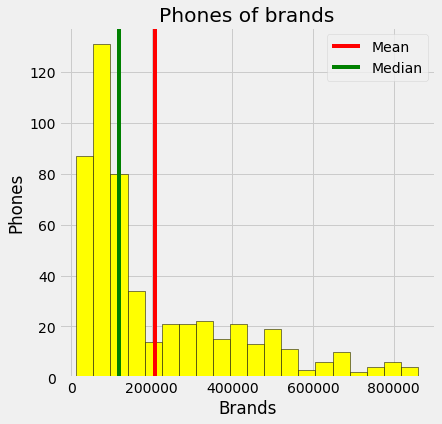

In [35]:
# Choose style 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Size of figure
plt.figure(figsize=(6, 6))

# Divide the course numbers into 20 categories
plt.hist(df['Price(Тг)'], bins=20, color='yellow', edgecolor='black')

# Find mean and median of phones
mean = st.mean(df['Price(Тг)'])
median = st.median(df['Price(Тг)'])

# PLOTTING
plt.axvline(mean, color='red', label='Mean')
plt.axvline(median, color='green', label='Median')

# These are small definitions
plt.title('Phones of brands')
plt.xlabel('Brands')
plt.ylabel('Phones')
plt.legend()
plt.show()

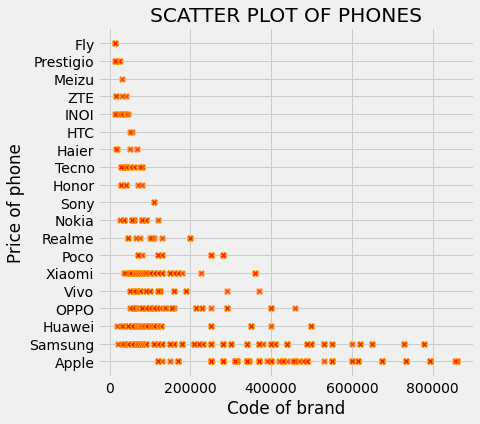

In [36]:
# Size of figure
plt.figure(figsize=(6, 6))

# Style of graph
plt.style.use('fivethirtyeight')

# Plot phones by brands and sizes of circle are number of phones 
plt.scatter(df['Price(Тг)'], df['Brand'], color='red', edgecolor='orange', marker='X',
           linewidth=1, alpha=0.75)

# Titles of graph
plt.xlabel('Code of brand')
plt.ylabel('Price of phone')
plt.title('SCATTER PLOT OF PHONES')
plt.show()

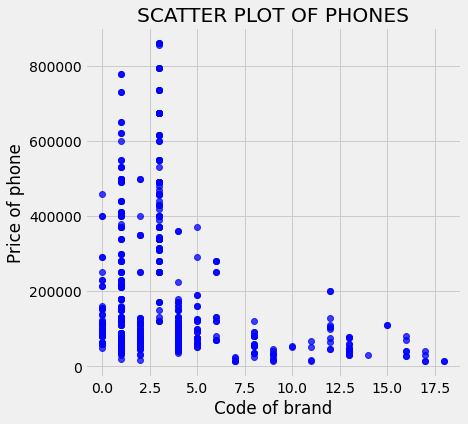

In [37]:
# Size of figure
plt.figure(figsize=(6, 6))

# Style of graph
plt.style.use('fivethirtyeight')

# Plot phones by brands and sizes of circle are number of phones 
plt.scatter(df['Code_brand'], df['Price(Тг)'], color='blue',
           linewidth=1, alpha=0.75)

# Titles of graph
plt.xlabel('Code of brand')
plt.ylabel('Price of phone')
plt.title('SCATTER PLOT OF PHONES')
plt.show()

<h1>Machine Learning

In [36]:
df.head(10)

,Name,Product code,Price(Тг),Brand,Code_brand
236,Apple iPhone 12 Pro Max 512GB Gold,474957,859890,Apple,3
250,Apple iPhone 12 Pro Max 512GB Graphite,474955,859890,Apple,3
483,Apple iPhone 12 Pro Max 512GB Silver,474956,859890,Apple,3
211,Apple iPhone 12 Pro Max 512GB Pacific Blue,474958,854890,Apple,3
286,Apple iPhone 12 Pro 512GB Graphite,474943,794890,Apple,3
263,Apple iPhone 12 Pro 512GB Gold,474945,794890,Apple,3
264,Apple iPhone 12 Pro 512GB Silver,474944,794890,Apple,3
245,Apple iPhone 12 Pro 512GB Pacific Blue,474946,794890,Apple,3
48,Samsung Galaxy Z Fold 2 Black,470333,777790,Samsung,1
70,Samsung Galaxy Z Fold 2 Brown,475938,777790,Samsung,1


In [37]:
X = df[['Product code', 'Price(Тг)']]
y = df['Code_brand']

In [38]:
print(X.shape)
print(y.shape)

(524, 2)
(524,)


# Scikit-learn 3 steps for modeling

In [39]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [42]:
knn.predict([[2, 5]])

array([14], dtype=int32)

In [43]:
X1 = [[2, 3], [5, 4]]
knn.predict(X1)

array([14, 14], dtype=int32)

__Using a different value for K__

In [44]:
# instantiate the model (using the value K=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
knn.predict(X1)

array([1, 1], dtype=int32)

In [45]:
# instantiate the model (using the value K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
knn.predict(X1)

array([14, 14], dtype=int32)

In [46]:
# instantiate the model (using the value K=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
knn.predict(X1)

array([1, 1], dtype=int32)

__Using a different classification model__

In [46]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict(X1)

array([3, 3], dtype=int32)

In [47]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

524

In [48]:
# Compute classification accuracy for the logistic regression model
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.8721374045801527


In [49]:
# KNN = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.7022900763358778


In [50]:
# KNN = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


# Train/test split

__STEP 1__

In [51]:
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3)

In [52]:
# Print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(262, 2)
(262, 2)


In [53]:
# Print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(262,)
(262,)


__STEP 2__

In [54]:
# Train the model on the training set
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

__STEP 3__

In [55]:
# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.30916030534351147


In [56]:
# Repeat for KNN with K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6374045801526718


In [57]:
# Repeat for KNN with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.4312977099236641


In [58]:
# Repeat for KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.37786259541984735


In [59]:
# Try K=1 through K=20 and record testing accuracy
k_range = list(range(1, 21))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

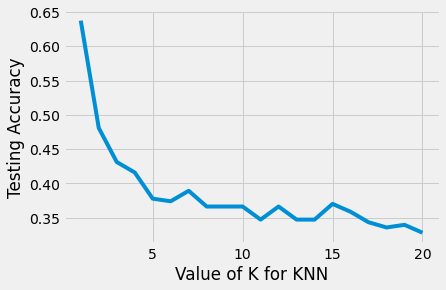

In [60]:
# Plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [67]:
# 10-fold cross-validation with the KNN model
knn = KNeighborsClassifier(n_neighbors=1)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.3895500725689405


c:\users\lenovo\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [68]:
# 10-fold cross-validation with logistic regression
logreg = LogisticRegression(multi_class='ovr',solver='liblinear')
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

c:\users\lenovo\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.30380986937590715
